# Sesion practica 3.

## Recordemos la ultima sesión

In [3]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import argparse
import seaborn as sns
import requests

In [1]:
from sklearn import datasets  # Import the datasets module from scikit-learn

# Generate synthetic data using the make_circles function
# n_samples: Number of points to generate
# noise: Standard deviation of Gaussian noise added to the data
# factor: Scale factor between inner and outer circle
circles, labels = datasets.make_circles(n_samples=100, noise=0.06, factor=0.4)

# Print the dimensions of the generated data
print('Data dimension: {}'.format(circles.shape))

Data dimension: (100, 2)


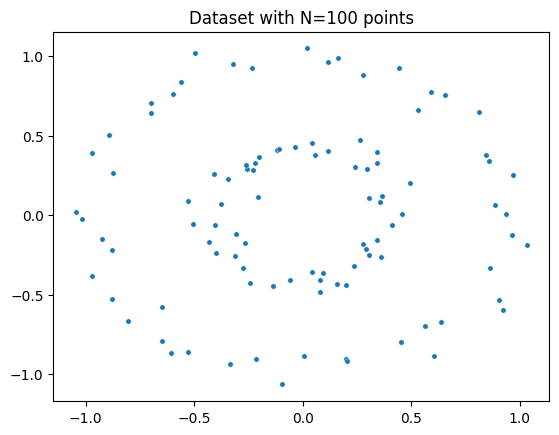

In [4]:
import seaborn as sns
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111)  # Add a subplot to the figure
ax = sns.scatterplot(x=circles[:,0], y=circles[:,1], s=15)  # Create a scatter plot using seaborn
plt.title('Dataset with N=%s points'%(circles.shape[0]))  # Set the title of the plot
plt.show()  # Display the plot

In [5]:
# Create a Rips complex with a maximum edge length of 0.6
Rips_complex = gd.RipsComplex(circles, max_edge_length=0.6)

In [7]:
#Create a simplex tree from the Rips complex with a maximum dimension of 3
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=3) 

In [8]:
diag_Rips = Rips_simplex_tree.persistence()

usetex mode requires dvipng.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

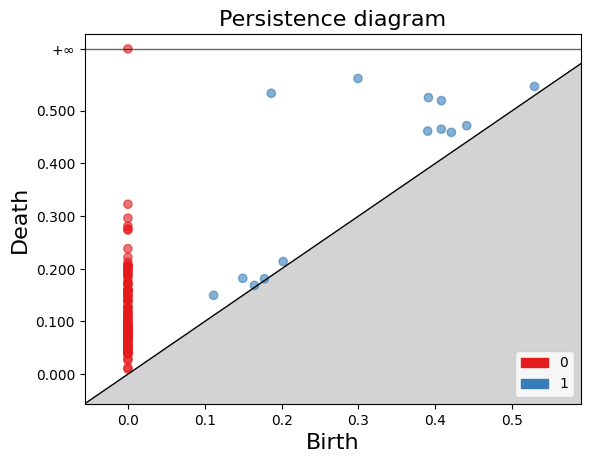

In [9]:
# Plot the persistence diagram
gd.plot_persistence_diagram(diag_Rips, legend=True)

## Algunas funciones de Gudhi relacionas con simplex tree

`Rips_simplex_tree.get_skeleton(2)`:

Este comando utiliza el método get_skeleton() de un objeto RipsSimplexTree para obtener el esqueleto (o subconjunto de símplices) del complejo simplicial hasta la dimensión 2. El esqueleto de un complejo simplicial conserva ciertas conexiones y propiedades topológicas de los símplices originales. En este caso, get_skeleton(2) retorna todos los símplices de dimensiones 0, 1 y 2 presentes en el complejo simplicial, lo que incluye vértices (0-símplices), aristas (1-símplices) y triángulos (2-símplices).

In [11]:
list(Rips_simplex_tree.get_skeleton(2))

[([0, 1, 9], 0.5502721840036633),
 ([0, 1, 11], 0.5502721840036633),
 ([0, 1, 19], 0.5758112333690908),
 ([0, 1, 25], 0.5502721840036633),
 ([0, 1, 38], 0.5502721840036633),
 ([0, 1, 51], 0.5968472560073691),
 ([0, 1, 53], 0.5502721840036633),
 ([0, 1, 55], 0.5502721840036633),
 ([0, 1, 60], 0.5502721840036633),
 ([0, 1, 61], 0.5502721840036633),
 ([0, 1, 65], 0.5502721840036633),
 ([0, 1, 80], 0.5502721840036633),
 ([0, 1, 86], 0.5502721840036633),
 ([0, 1, 89], 0.5502721840036633),
 ([0, 1], 0.5502721840036633),
 ([0, 6, 9], 0.4621040052242302),
 ([0, 6, 11], 0.567845812433038),
 ([0, 6, 25], 0.5726576512755791),
 ([0, 6, 53], 0.5374377103108376),
 ([0, 6, 55], 0.4621040052242302),
 ([0, 6, 67], 0.5254808967335546),
 ([0, 6, 69], 0.4621040052242302),
 ([0, 6, 71], 0.5703125342904829),
 ([0, 6, 74], 0.4621040052242302),
 ([0, 6, 89], 0.5532694549379622),
 ([0, 6], 0.4621040052242302),
 ([0, 9, 11], 0.21804401606052004),
 ([0, 9, 14], 0.5106642587990063),
 ([0, 9, 19], 0.57581123336909

`Rips_simplex_tree.get_simplices()`:

Este comando utiliza el método `get_simplices()` de un objeto RipsSimplexTree para obtener todos los símplices presentes en el árbol. Un simplex es un término general en topología que se refiere a un conjunto de puntos que se extiende en un espacio y puede ser un punto, una línea, un triángulo, etc., dependiendo de su dimensión. En el contexto de análisis topológico y persistente, los símplices se utilizan para representar características topológicas en los datos.

In [15]:
list(Rips_simplex_tree.get_simplices())

[([0, 1, 9, 11], 0.5502721840036633),
 ([0, 1, 9, 19], 0.5758112333690908),
 ([0, 1, 9, 25], 0.5502721840036633),
 ([0, 1, 9, 38], 0.5502721840036633),
 ([0, 1, 9, 51], 0.5968472560073691),
 ([0, 1, 9, 53], 0.5502721840036633),
 ([0, 1, 9, 55], 0.5502721840036633),
 ([0, 1, 9, 60], 0.5502721840036633),
 ([0, 1, 9, 61], 0.5502721840036633),
 ([0, 1, 9, 65], 0.5502721840036633),
 ([0, 1, 9, 80], 0.5502721840036633),
 ([0, 1, 9, 86], 0.5502721840036633),
 ([0, 1, 9, 89], 0.5502721840036633),
 ([0, 1, 9], 0.5502721840036633),
 ([0, 1, 11, 19], 0.5758112333690908),
 ([0, 1, 11, 25], 0.5502721840036633),
 ([0, 1, 11, 38], 0.5502721840036633),
 ([0, 1, 11, 51], 0.5968472560073691),
 ([0, 1, 11, 53], 0.5502721840036633),
 ([0, 1, 11, 55], 0.5502721840036633),
 ([0, 1, 11, 60], 0.5502721840036633),
 ([0, 1, 11, 61], 0.5502721840036633),
 ([0, 1, 11, 65], 0.5502721840036633),
 ([0, 1, 11, 80], 0.5502721840036633),
 ([0, 1, 11, 86], 0.5502721840036633),
 ([0, 1, 11, 89], 0.5502721840036633),
 ([0


`Rips_simplex_tree.get_boundaries([0, 9, 38, 51])`:

Esta línea de código utiliza el método `get_boundaries()` de un objeto RipsSimplexTree (un árbol de símplices creado a partir de la construcción de Rips) para obtener las fronteras correspondientes a un conjunto de índices de símplices. La lista `[0, 9, 38, 51]` contiene los índices de los símplices para los cuales deseas obtener las fronteras. Las fronteras son partes esenciales en el análisis topológico que permiten comprender las relaciones entre los símplices y sus dimensiones. Las fronteras son complejos de dimensión inferior que "delimitan" los símplices de dimensiones superiores en un complejo simplicial.

In [21]:
list(Rips_simplex_tree.get_boundaries([0, 9, 38, 51]))

[([0, 9, 38], 0.34005850439235047),
 ([0, 9, 51], 0.5968472560073691),
 ([0, 38, 51], 0.5968472560073691),
 ([9, 38, 51], 0.5443581033574219)]

In [29]:
list(Rips_simplex_tree.get_boundaries([0, 9, 38]))

[([0, 9], 0.1496502155790508),
 ([0, 38], 0.34005850439235047),
 ([9, 38], 0.2504037874644892)]

In [22]:
Rips_simplex_tree.betti_numbers()

[1, 0, 0]

## Como hacemos para ver la representación grafica de los complejos simpliciales.

### Debemos obtener, los traingulos!

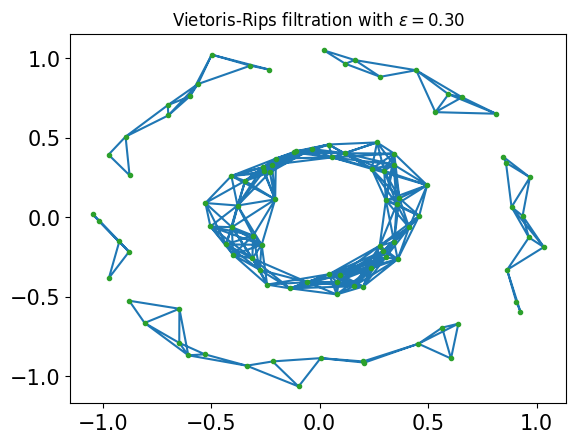

In [31]:
# Definir el valor de 'eps' como 0.2
eps = 0.3

# Obtener los triángulos de dimensión 2 filtrados con ciertas condiciones del Rips Simplex Tree
# Esto incluye los triángulos con 3 vértices y diámetro menor o igual a 'eps'
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])

# Graficar los bordes de los triángulos filtrados en el plano
plt.triplot(circles[:,0], circles[:,1], triangles)

# Graficar los puntos originales como puntos en el plano
plt.plot(circles[:,0], circles[:,1], '.')

# Establecer el título de la trama con el valor de 'eps'
plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")

# Desactivar una cuadrícula en la trama (comentada en este caso)
# plt.grid(color='black', linestyle='-', linewidth=1)

# Ajustar el tamaño de las etiquetas de los ejes x e y
plt.xticks(size=15)
plt.yticks(size=15)

# Mostrar la trama
plt.show()


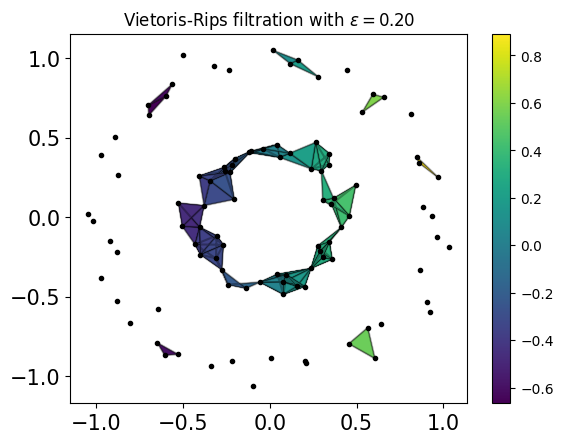

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi

# Define the value of 'eps' as 0.2
eps = 0.2

# 'triangles' will contain the filtered triangles
# Get the dimension-2 triangles from the simplicial skeleton using the get_skeleton() function of GUDHI
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps])

# Create a figure and an axis
fig, ax = plt.subplots()

# Create a triangulation for the plt.tripcolor() function
triang = mtri.Triangulation(circles[:, 0], circles[:, 1], triangles)

# Define a color map based on a specific value (e.g., x-coordinate)
cmap = plt.get_cmap('viridis')  # Choose a colormap

# Get color values based on the x-coordinate of the vertices
color_values = circles[:, 0]

# Colored triangles using plt.tripcolor()
collec = ax.tripcolor(triang, color_values, cmap=cmap, edgecolors='k')

# Add a colorbar
plt.colorbar(collec, ax=ax)

# Scatter plot to add points
plt.scatter(circles[:, 0], circles[:, 1], c='black', marker='.')

# Plot edges using the triangulation
plt.triplot(triang, 'k-', alpha=0.3)

# Set the title of the plot using the value of 'eps'
plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")

# Save the figure as a PNG file with a name based on 'eps'
plt.savefig(f'filtration{int(eps*100):03}.png', dpi=600, transparent=True)

# Adjust the size of the x and y axis labels
plt.xticks(size=15)
plt.yticks(size=15)

# Show the plot
plt.show()